# Project 4: Recreating the Hubble Ultra Deep Field 
The Hubble Deep Field (HUDF) is a world renowed image taken in 1995 by the Hubble Space Telescope. The image has inspired a generation of astronomers and opened the door to exploring high redshift galaxis and the origins of the early universe. In this project I am to recreate the famaous image by downloading HST data and piecing together an RBG image displaying the results of the 2004 observation. In addition, emerging research into the expansion of the universe and spectroscopic research into the galaxies featured in the image show that these galaxies are moving and have corresponding doppler shifts. In this project I want to overlay the doppler shift data onto the HUDF to visualize the behavior of these galaxies for future scientific endevors. 





# Important packages 
Outside of the standard python packages necessary for a project like this I also included a variety of astropy packages necessary for preserving coordinates, units, and the ability to overlay Red Green and Blue image data into one mosaic. 


In [ ]:

#The astrpy libraray has a varity of astronomy focused tools which are essential for this project
from astropy.io import fits 
from astropy.wcs import WCS 
from astropy.visualization import make_lupton_rgb
import astropy.units as u
from astropy.coordinates import SkyCoord

#IMportating Vizier makes it easy to get data from atricles and such 
from astroquery.vizier import Vizier

#These are the standard numpy packages used in data visualization 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 




# Function Definitions
This next block of code is to define a variety of functions used to scale the fits data. There are two options log and linear scales with adjustable min and max values so that the image can be scaled precisly. Loading the fits files in DS9 to find the best values I decided to use a log scale with the values trimmed at 7.5 and 92.5 percent. 

In [ ]:
def scale_data(data): 
      """Linear scale function to scale the data linearly. This has adjustable values for the p_low and p_high. 
      The function just needs input parameters for 'data' which would be in the form of a fits file """
      #Choose the p_low and p_high values in order to scale the data to a given percent
      p_low, p_high = np.percentile(data, [7.5, 92.5])

      #Using the numpy clip function to trim the data to the specified values  
      data = np.clip(data, p_low, p_high)
      data = data - p_low  # Shift the scale to start from 0
      data = data / (p_high - p_low)  # Scale the data to run from 0 to 1

      return data

def scale_data_log(data):
    """Log scale function to scale the data logarithmically. This function has adjustable values for p_low and p_high.
      The function just needs input parameters for 'data' which would be in the form of a fits file"""
   
    # Clip data using the p_low and p_high percentiles
    p_low, p_high = np.percentile(data, [7.5, 92.5])

    #Use the numpy clip function to trim the data to the specified values
    data = np.clip(data, p_low, p_high)
    
    # Avoid log errors by replacing non-positive values
    data[data <= 0] = np.min(data[data > 0]) * 0.1  
    
    # Apply log scale
    log_data = np.log10(data)

    # Normalize between 0 and 1
    log_min, log_max = log_data.min(), log_data.max()
    scaled_data = (log_data - log_min) / (log_max - log_min)

    return scaled_data

def make_brighter(data):
      '''This function is just to multiplpy the data by a small correction value so that we can make the overall image brighter. 
      There is no change to the overall contrast just makes the image brighter overall by increasing the overall value'''
     
      bright_data = data * .03 
      return bright_data

# Loading in the RBG fits files 
In this step the dowloaded data from the Hubble Space Telescope is scaled and combined using the astropy packages. The image will preserve the coordinates in RA and DEC for each object shown and by combining the data from the red, blue and, green filters we are able to visualize a full color image. 

In [ ]:
#Open the fits files to extract the image data. Each file should be in the same directory as this file. 

red = fits.open('h_udf_wfc_i_drz_img.fits') 
green = fits.open('h_udf_wfc_v_drz_img.fits')
blue =  fits.open('h_udf_wfc_b_drz_img.fits')


#Extract the data from each file as its stored in the first index of each fits file
red_data = red[0].data
blue_data = blue[0].data
green_data = green[0].data

#Apply the chosen scale to each data set. Here the log scaled function is used to get the best image and the most detail
red_scaled = scale_data_log(red_data)
green_scaled = scale_data_log(green_data)
blue_scaled = scale_data_log(blue_data)

#This will creatte the RGB images from the previous three fits files.
#The imported function combines the image files into one labels RGB 

RGB = make_lupton_rgb(red_scaled, green_scaled, blue_scaled, stretch = 7, Q= 4.5)

#The original image is too dark but still has a lot of detail. To make the overall image brighter apply the make_brighter function 

Bright_RGB = make_brighter(RGB)

#Adding wcs so that we can keep track of the RA and Dec on the image. The WCS package is imported from astropy
wcs = WCS(red[0].header)


#Close the original fits files 
red.close()
blue.close()
green.close()


#Shows the RGB image created. This function creates a graph with labels axes and a white grid to distinguish RA and DEC coordinates. 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1, 1, 1, projection = wcs)
ax.imshow(Bright_RGB, origin = 'lower')
ax.set_xlabel("RA")
ax.set_ylabel("DEC")
ax.grid(color = 'white', ls = 'dashed', lw = .1)

plt.show()

# Downloaded image of the Hubble Ultra Deep Field (2004)
![Screenshot 2025-02-23 at 12.49.39 PM.png](<attachment:Screenshot 2025-02-23 at 12.49.39 PM.png>)
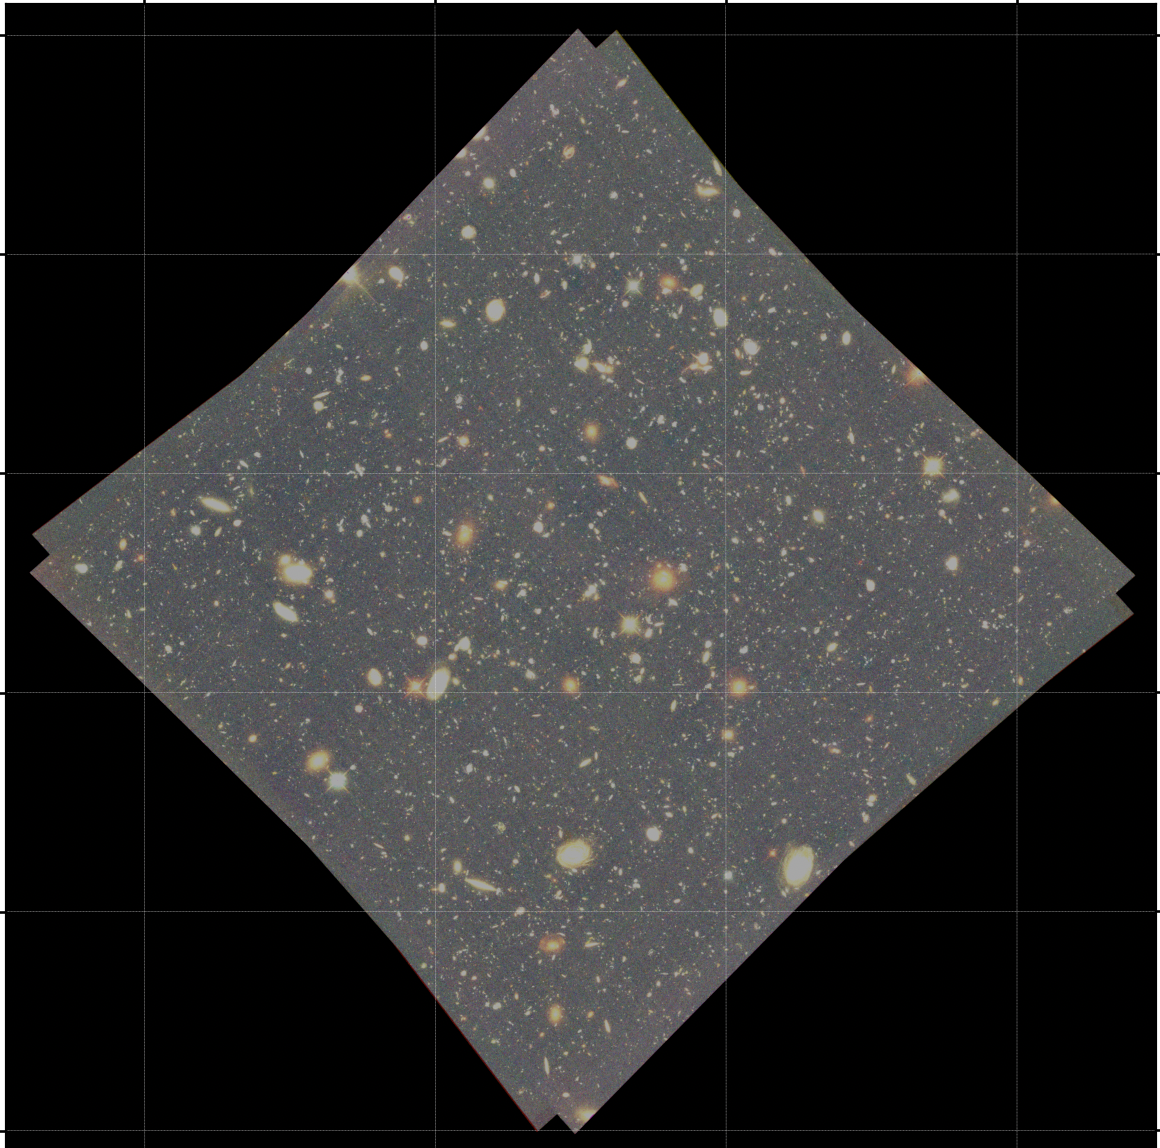

This image can be edited further to increase the contrast and blacks to ultimatly create the world famous HUDF. This process can be done in python but for simplicty was done using a standard photo editor. Now the image can be used to appply dopler shift data to the various galaxies pictured. 

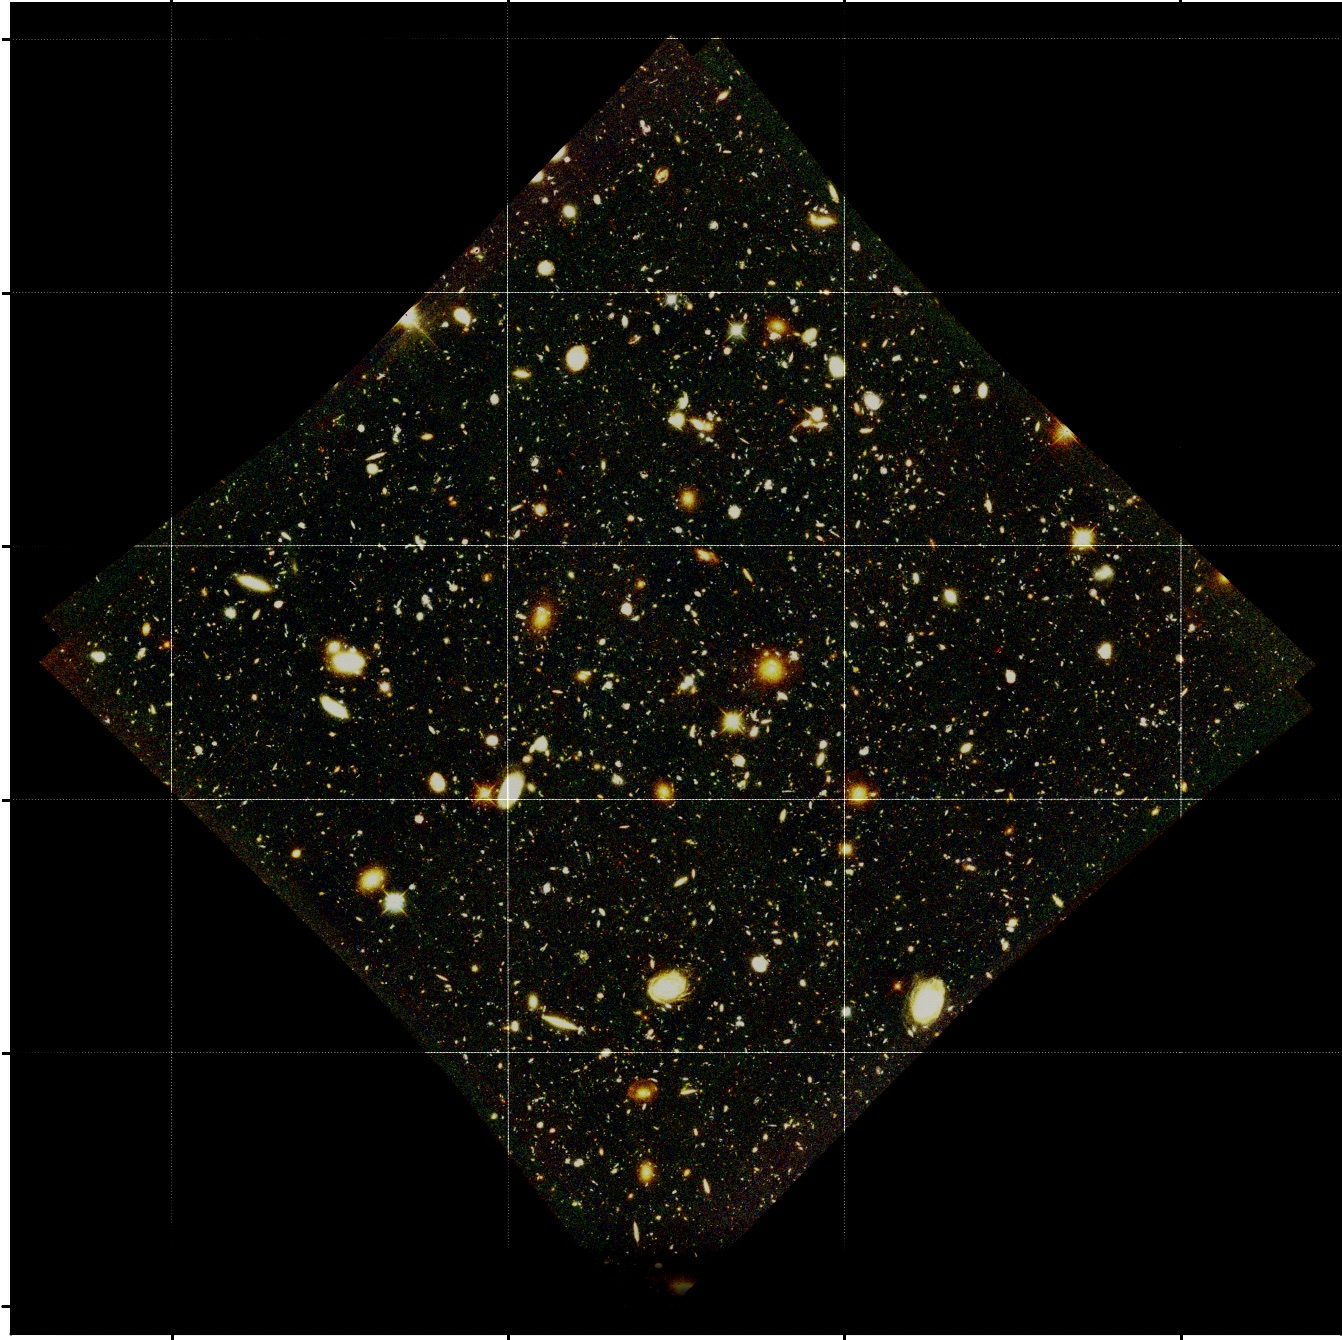